In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4950,ham,hi baby im sat on the bloody bus at the mo and...,NaN,NaN,NaN
3090,spam,LORD OF THE RINGS:RETURN OF THE KING in store ...,NaN,NaN,NaN
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...,NaN,NaN,NaN
4102,spam,U have a secret admirer who is looking 2 make ...,NaN,NaN,NaN
3348,ham,Oh is it! Which brand?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# stages
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluations
6. Improvements
7. Website
8. Deploy

### 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# you can v1 and v2 have  complete values but ' Unnamed: 2 ', ' Unnamed: 3 ' and ' Unnamed: 4' have approx all the values are null , so we can drop 
# these columns

In [7]:
# drop last 3 columns and make the operaton permanent
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2826,ham,"Oh right, ok. I'll make sure that i do loads o..."
298,ham,I cant pick the phone right now. Pls send a me...
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?
3886,ham,Cab is available.they pick up and drop at door...
4024,ham,&lt;#&gt; in mca. But not conform.


In [9]:
# here columns name doesn't make any scense, so we can rename this
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
2548,ham,Honestly i've just made a lovely cup of tea an...
3454,ham,No need lar. Jus testing e phone card. Dunno n...
2580,spam,U are subscribed to the best Mobile Content Se...
447,ham,I wont get concentration dear you know you are...
429,ham,I wnt to buy a BMW car urgently..its vry urgen...


In [11]:
# now lets apply label encoder on target columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.sample(5)

,target,text
3486,0,Change windows logoff sound..
2355,0,"Hello, my love ! How went your day ? Are you a..."
2454,0,Left dessert. U wan me 2 go suntec look 4 u?
5128,0,Wot about on wed nite I am 3 then but only til 9!
4855,0,yes baby! I need to stretch open your pussy!


In [15]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# there is no any missing vsalues

In [17]:
# checking the duplicates
df.duplicated().sum()

403

In [18]:
# removing the duplicates
df=df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2.EDA

In [21]:
# checking how many datas are ham and spam
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [23]:
## you can see ham is approx 87% and spam is approx 13% in our data
4516/5159

0.8753634425276217

In [24]:
import matplotlib.pyplot as plt


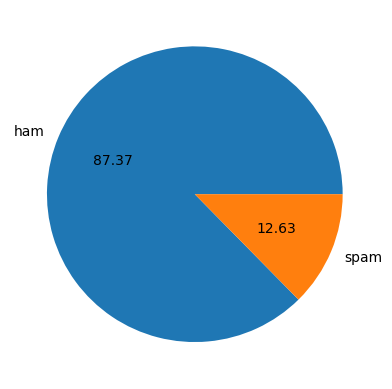

In [25]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

### clearly data is imbalanced

In [26]:
# now we can check , in our data how many alphabets,words and sentences are used in each message   ---> for doing this we have need of nltk libraries

In [27]:
!pip install nltk

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jayra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

🔑 Difference in simple words:

`punkt`→ the brain (models) of the tokenizer.

`punkt_tab` → the dictionary/lookup tables (language-specific rules).

Both are needed together in newer NLTK versions.

### Downloads the `'punkt'` tokenizer models, which are pre-trained models used for sentence segmentation and word `tokenization`

In [31]:
df['text'].apply(len)  # it will return the length of each message in term of number of character used

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [32]:
df['num_characters'] = df['text'].apply(len)

In [33]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# fetching number of words
df['text'].apply(lambda x : nltk.word_tokenize(x) )

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [35]:
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)) )

In [36]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
# adding the count of number of sentences
df['text'].apply(lambda x : nltk.sent_tokenize(x)) 

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [38]:

df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)) )

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
# lets check what is happining with the   num_characters,num_words & num_sentences columns
df.describe() 

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [41]:
# we can analyse ham and spam independently

# for ham messages
df[df['target'] == 0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
# for spam messages
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


###  you  can observe side by side 
- mean of `num_characters` = 70 in `ham` messages but in `spam` it is approx 137
- mean of `num_words` = 17 in `ham` messages but in `spam` it is approx 27
- mean of `num_sentences` = ~2  in `ham` messages but in `spam` it is approx ~3


#### `in conclusion we can say that spam messages are generally long`

In [43]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

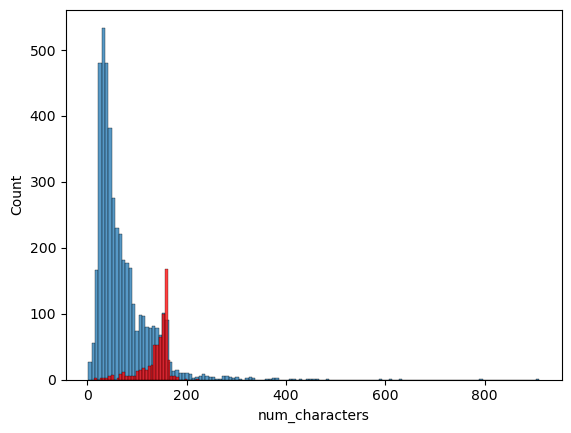

In [44]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

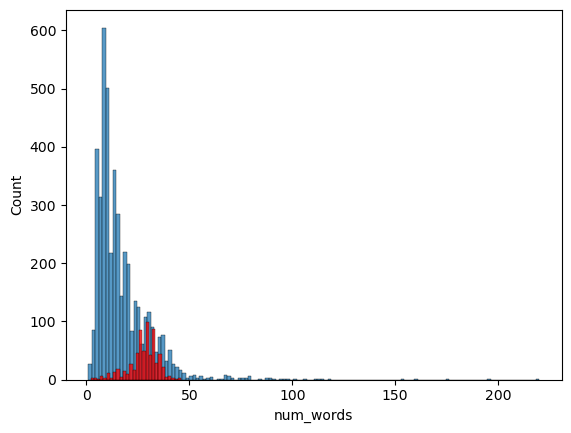

In [45]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

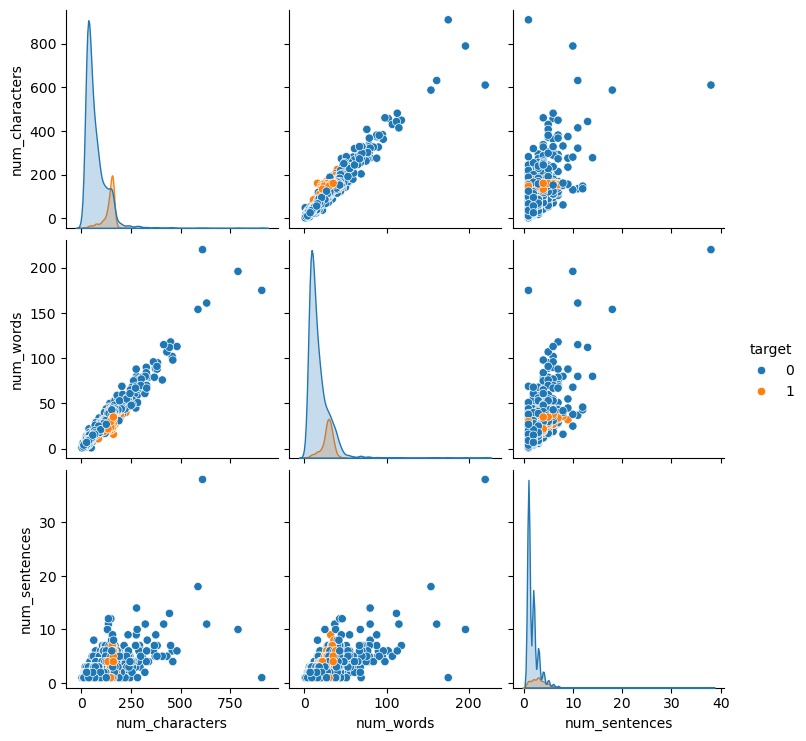

In [46]:
sns.pairplot(df,hue='target')

In [47]:
df.sample(2)

,target,text,num_characters,num_words,num_sentences
552,0,"Sure, if I get an acknowledgement from you tha...",120,23,1
70,0,Wah lucky man... Then can save money... Hee...,46,11,1


In [48]:
df[['target','num_characters','num_words','num_sentences']]

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


<Axes: >

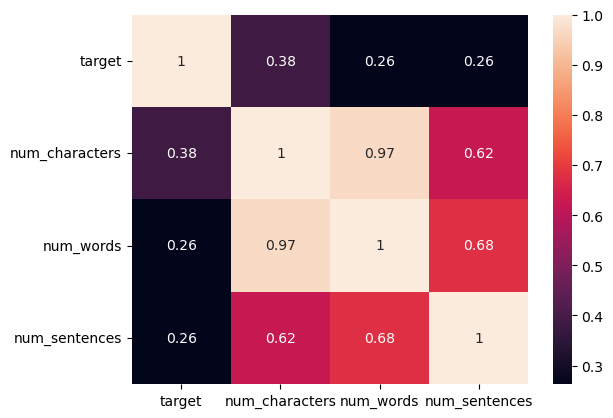

In [49]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [50]:
# you can clearly see 'num_sentences','num_words' & 'num_characters' are heighly corelated -> so, multicolinearity can be a problem
# for that i will keep only one column (ie. num_characters   because it represents the target column s better) 
# to reduce the impact of multicolinearity 

### text preprocessing
- lower casing
- tokenization
- Removing special characters
- removing punctuation
- stemming

In [51]:
df.head(3)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [52]:
import string
import nltk
from nltk.corpus import stopwords

In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('dancing')

'dancing'

In [55]:
def transform_text(text):
    # lower casing
    text=text.lower()
    # tokenization
    text=nltk.word_tokenize(text)
    y=[]
    #Removing special characters and punctuation
    for i in text:
        if i.isalnum():
            y.append(i)
# stop word removal
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    # lemmatization
    text=y[:]
    y.clear()
    for i in text:
        y.append(lemmatizer.lemmatize(i))
# returing in the format of string
    return " ".join(y)
    

In [56]:
transform_text('Hi how are you jay ? , i loved the youtube lectures on machine learning . how about you')

'hi jay loved youtube lecture machine learning'

In [57]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [58]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [59]:
df['text'].apply(transform_text)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    2nd time tried 2 contact u pound prize 2 claim...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [60]:
df['transformed_text']=df['text'].apply(transform_text)

In [61]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...


In [62]:
# now i will use 'transformed_text' and 'target' columns

In [63]:
# now i will see which word are most common in our corpus for that i will make a word cloude
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [64]:
wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

In [65]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

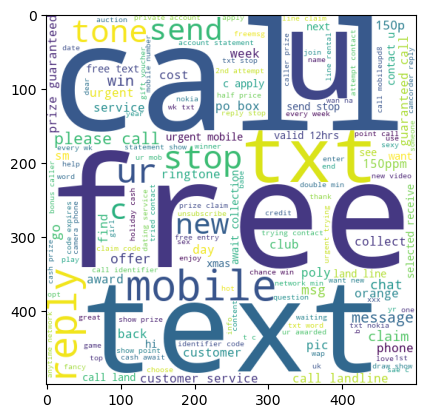

In [66]:
plt.imshow(spam_wc)

In [67]:
# you can see most of the words lokking like a spam

In [68]:
# printing word cloude for ham messages
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

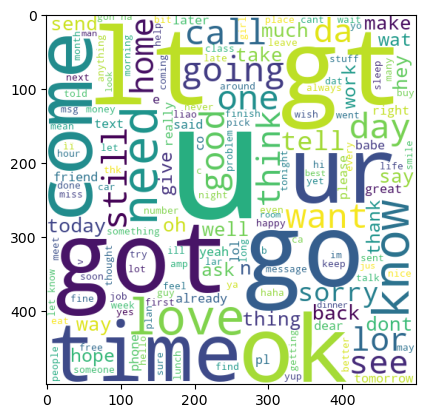

In [69]:
plt.imshow(ham_wc)

In [70]:
# checking the most common 30 words of ham and spam messages
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni


In [71]:
df[df['target']==1]['transformed_text']

2       free entry 2 wkly comp win fa cup final tkts 2...
5       freemsg hey darling 3 week word back like fun ...
8       winner valued network customer selected receiv...
9       mobile 11 month u r entitled update latest col...
11      six chance win cash 100 pound txt csh11 send c...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    asked 3mobile 0870 chatlines inclu free min in...
5547    contract mobile 11 mnths latest motorola nokia...
5566    reminder o2 get pound free call credit detail ...
5567    2nd time tried 2 contact u pound prize 2 claim...
Name: transformed_text, Length: 653, dtype: object

In [72]:
# converting into a list
df[df['target']==1]['transformed_text'].tolist()

['free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv',
 'winner valued network customer selected receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 'six chance win cash 100 pound txt csh11 send cost 6days tsandcs apply reply hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt message click http',
 'england v macedonia dont miss news txt ur national team 87077 eg england 87077 try wale scotland poboxox36504w45wq',
 'thanks subscription ringtone uk mobile charged please confirm replying yes reply charged',
 '07732584351 rodger burn msg tried call reply sm free nokia mobile free camcorder 

In [73]:
for msg in df[df['target']==1]['transformed_text'].tolist():
    print(msg)

free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18
freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv
winner valued network customer selected receivea prize reward claim call claim code kl341 valid 12 hour
mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030
six chance win cash 100 pound txt csh11 send cost 6days tsandcs apply reply hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt message click http
england v macedonia dont miss news txt ur national team 87077 eg england 87077 try wale scotland poboxox36504w45wq
thanks subscription ringtone uk mobile charged please confirm replying yes reply charged
07732584351 rodger burn msg tried call reply sm free nokia mobile free camcorder please call 08000930705 delivery tomor

In [74]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [75]:
len(spam_corpus)

9939

In [76]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 313,
         'free': 191,
         '2': 155,
         'txt': 130,
         'u': 126,
         'text': 121,
         'ur': 119,
         'mobile': 114,
         'stop': 104,
         'claim': 98,
         'reply': 97,
         '4': 97,
         'prize': 82,
         'c': 80,
         'get': 70,
         'new': 64,
         'service': 64,
         'tone': 63,
         'send': 58,
         'urgent': 57,
         'nokia': 54,
         'phone': 52,
         'cash': 51,
         'contact': 51,
         'week': 49,
         'please': 49,
         'win': 48,
         'min': 45,
         'customer': 42,
         'guaranteed': 42,
         'per': 41,
         'message': 40,
         'chat': 36,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'show': 33,
         'today': 33,
         'line': 33,
         'offer': 32,
         'awarded': 31,
         'latest': 30,
         'landline': 30,
         'want': 30,
         '150ppm': 29,
         'go': 29,
   

In [77]:
Counter(spam_corpus).most_common(30)

[('call', 313),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 126),
 ('text', 121),
 ('ur', 119),
 ('mobile', 114),
 ('stop', 104),
 ('claim', 98),
 ('reply', 97),
 ('4', 97),
 ('prize', 82),
 ('c', 80),
 ('get', 70),
 ('new', 64),
 ('service', 64),
 ('tone', 63),
 ('send', 58),
 ('urgent', 57),
 ('nokia', 54),
 ('phone', 52),
 ('cash', 51),
 ('contact', 51),
 ('week', 49),
 ('please', 49),
 ('win', 48),
 ('min', 45),
 ('customer', 42),
 ('guaranteed', 42)]

In [78]:
# making a df 
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,313
1,free,191
2,2,155
3,txt,130
4,u,126
5,text,121
6,ur,119
7,mobile,114
8,stop,104
9,claim,98


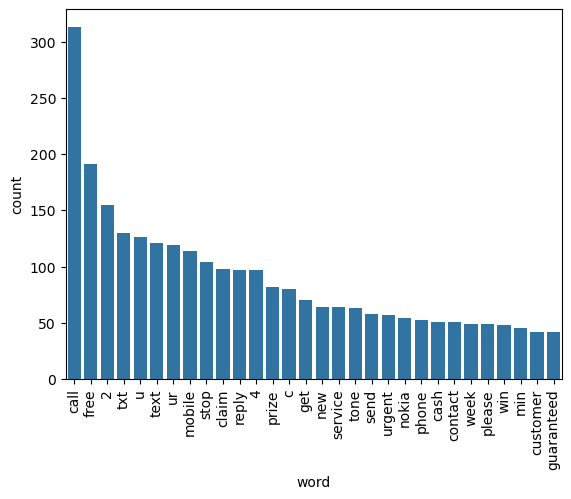

In [79]:
# Create a DataFrame from the Counter results
most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Use named parameters x and y instead of positional arguments
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [81]:
len(ham_corpus)

35404

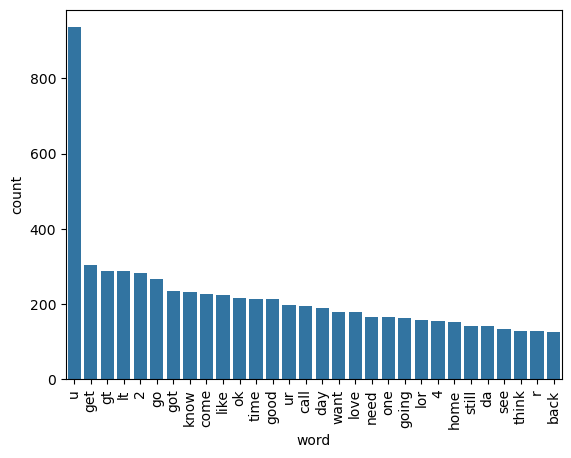

In [82]:
# Create a DataFrame from the Counter results
most_common_df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Use named parameters x and y instead of positional arguments
sns.barplot(x='word', y='count', data=most_common_df_ham)
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [83]:
# vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
vectorizer.fit_transform(df['transformed_text'])



<5169x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 35810 stored elements in Compressed Sparse Row format>

In [84]:
vectorizer.fit_transform(df['transformed_text']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
X = vectorizer.fit_transform(df['transformed_text']).toarray()

In [86]:
X.shape

(5169, 3000)

### scaling our data 
- MinMaxScaler
- Standard Scaler (cant use bcz naive bayes doesn't accept the negative value , but Standard scaler give the both negative and positive)

In [87]:
y= df['target'].values

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [90]:
# since i have n idea about the distribution of the data so trying all of three types
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [91]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [92]:
# gaussiaon NB
gnb.fit(X_train,y_train)

GaussianNB()

In [93]:
y_pred1=gnb.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score

In [95]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8849129593810445
[[799  97]
 [ 22 116]]
0.5446009389671361


In [96]:
# precision score is very bad , since data is imbalanced so, for that matter i am focusing on precision_score

In [203]:
# Multinomial NB
mnb.fit(X_train,y_train)


MultinomialNB()

In [205]:
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [99]:
# multinomial is doing well

In [100]:
# trying the Bernaulii

In [101]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [102]:
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[896   0]
 [ 16 122]]
1.0


#### since Multinomial NB giving the best precission score but accurecy is littlr bit less but in this scenarion accuracy is not a reliable measure so that i would prefer to go with the MultinomialNB

In [103]:
## i have choose mnb and tfidf

In [104]:
# applying some anothe ML algo

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [106]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [107]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [108]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [109]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [110]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.85
For  LR
Accuracy -  0.9506769825918762
Precision -  0.9393939393939394
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\jayra\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9478260869565217
For  BgC
Accuracy -  0.960348162475822
Precision -  0.875968992248062
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.908256880733945
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9421487603305785


In [111]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [112]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.973888,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.966667
6,AdaBoost,0.966151,0.947826
10,xgb,0.970019,0.942149
4,LR,0.950677,0.939394
9,GBDT,0.952611,0.908257
7,BgC,0.960348,0.875969


In [113]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [114]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,AdaBoost,Accuracy,0.966151
6,xgb,Accuracy,0.970019
7,LR,Accuracy,0.950677
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.960348


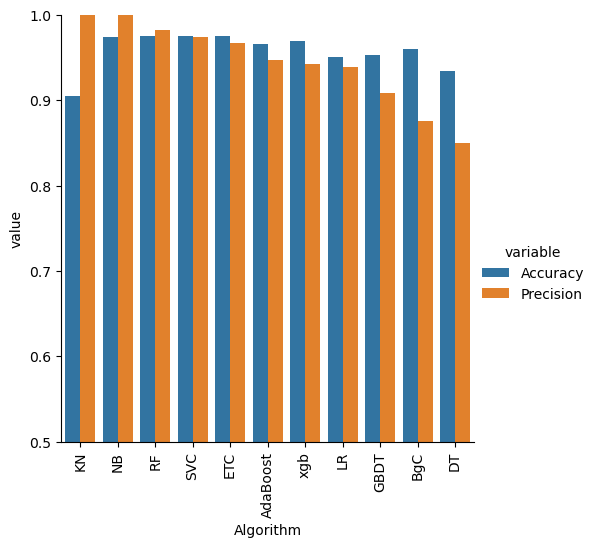

In [115]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [116]:
# model improve
# 1. Change the max_features parameter of TfIdf
# and 2. scaling the vector

In [117]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [118]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [119]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [120]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [121]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [122]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667
5,AdaBoost,0.966151,0.947826,0.966151,0.947826,0.966151,0.947826,0.966151,0.947826
6,xgb,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149,0.970019,0.942149
7,LR,0.950677,0.939394,0.950677,0.939394,0.950677,0.939394,0.950677,0.939394
8,GBDT,0.952611,0.908257,0.952611,0.908257,0.952611,0.908257,0.952611,0.908257
9,BgC,0.960348,0.875969,0.960348,0.875969,0.960348,0.875969,0.960348,0.875969


#### trying voting classifier
`A Voting Classifier is an ensemble method that combines multiple models (like Logistic Regression, SVM, Decision Tree) and predicts the final output by taking a majority vote (hard voting) or averaging predicted probabilities (soft voting).`

In [123]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [124]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [125]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [126]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9916666666666667


###  trying Stacking
`it is similar of voting classifier but in satacking we provide the weights to the each models`

In [127]:
from sklearn.ensemble import StackingClassifier

In [128]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [129]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [130]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9612403100775194


In [209]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [220]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u pound prize 2 claim...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...


In [224]:
df['text'][5567]

'This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'